In [1]:
from __future__ import print_function, division
import os
from collections import OrderedDict
import logging

import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# Make the plots look pretty
matplotlib.rc('font',size=13)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('image', cmap='inferno')
matplotlib.rc('image', interpolation='none')
# Use the same color cylcer as Seaborn
from cycler import cycler
color_cycle = [u'#4c72b0', u'#55a868', u'#c44e52', u'#8172b2', u'#ccb974', u'#64b5cd']
matplotlib.rcParams['axes.prop_cycle'] = cycler("color", color_cycle)

import lsst.afw.table as afwTable
import lsst.log as log
import lsst.meas.deblender
from lsst.meas.deblender import nmf, proximal, display
import lsst.meas.deblender.utils as debUtils

logger = logging.getLogger("lsst.meas.deblender")
logger.setLevel(logging.INFO)
log.setLevel("", log.INFO)

INFO:lsst.meas.deblender.proximal:Total parents: 41
INFO:lsst.meas.deblender.proximal:Unblended sources: 25
INFO:lsst.meas.deblender.proximal:Sources with multiple peaks: 16


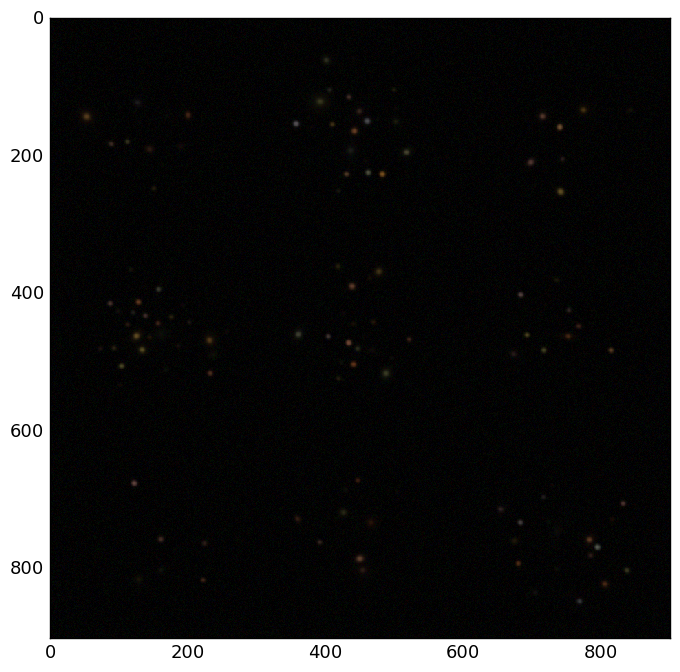

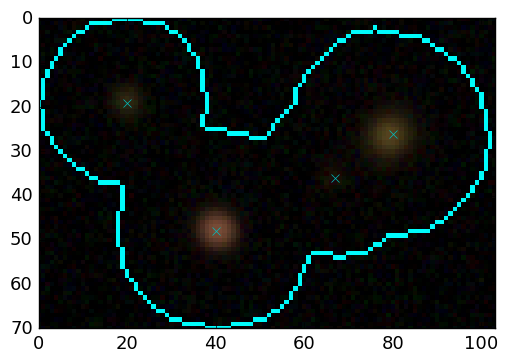

In [2]:
dataPath = os.path.abspath(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..','data', 'sim_data'))
filters = ["g","r", "i","z",'y']
imgFilename = os.path.join(dataPath, "test2/{0}_{1}.fits")
catFilename = os.path.join(dataPath, "test2/det_merge.fits")
simFilename = os.path.join(dataPath, "test2/catalog_true.fits")

expDb = proximal.ExposureDeblend(filters, imgFilename, catFilename, simFilename)
display.plotColorImage(calexps=expDb.calexps, filterIndices=[2,1,0], contrast=1, figsize=(8,8));
footprint, peaks = expDb.getParentFootprint(parentIdx=0, condition=expDb.mergedTable["peaks"]==4, contrast=1)
deblend = proximal.DeblendedParent(expDb, footprint, peaks)

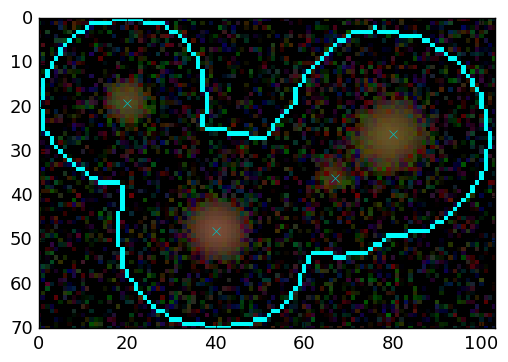

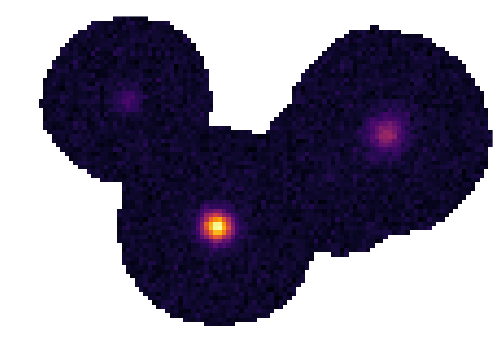

INFO:lsst.meas.deblender.proximal:constraints: M
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:0 1.49262602623 199 113.258791041 181 [1, 1, 1, 1]
INFO:lsst.meas.deblender.proximal_nmf:1 0.00124851072336 185 113.454603939 199 [47, 16, 16, 96]
INFO:lsst.meas.deblender.proximal_nmf:2 0.00127116903611 170 113.394404264 199 [46, 16, 15, 96]
INFO:lsst.meas.deblender.proximal_nmf:3 0.00125549923878 153 113.383783995 199 [46, 16, 15, 96]
INFO:lsst.meas.deblender.proximal_nmf:4 0.00124522331356 0 113.383799551 199 [46, 16, 15, 96]
INFO:lsst.meas.deblender.proximal_nmf:5 0.00123452175364 168 113.389668169 199 [46, 16, 15, 96]
INFO:lsst.meas.deblender.proximal_nmf:6 0.00122248748481 0 113.389672449 199 [46, 16, 15,

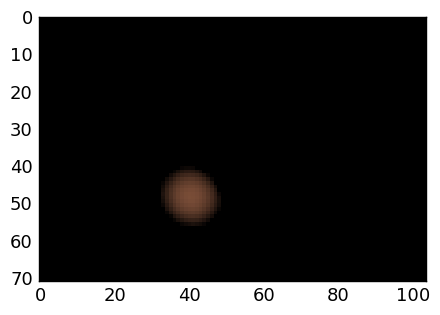

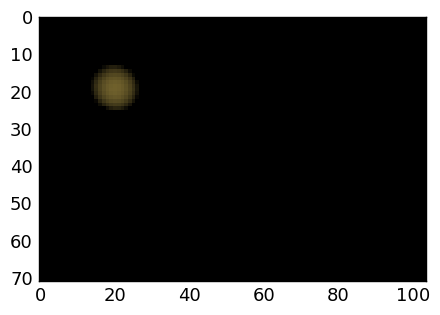

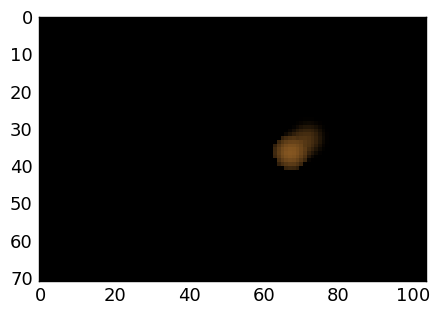

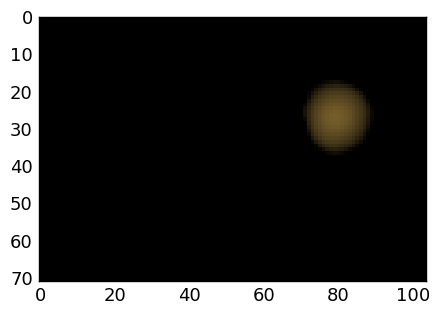

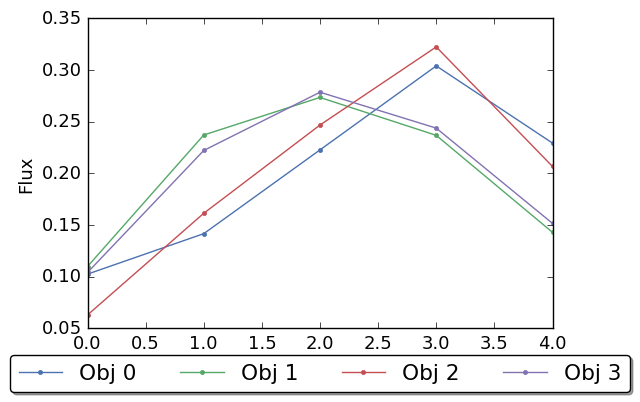

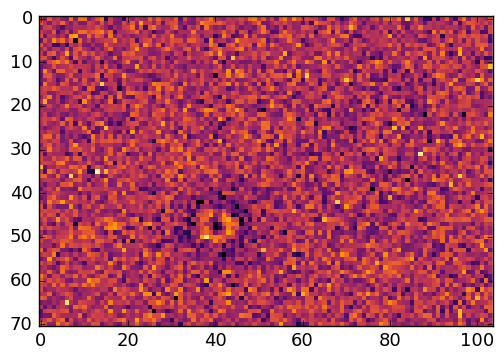

CPU times: user 1min 22s, sys: 801 ms, total: 1min 23s
Wall time: 1min 23s


In [3]:
%time admm = expDb.deblendParent(condition=expDb.mergedTable["peaks"]==4, display=True, maxiter=200, constraints='M', l0_thresh=0.005, usePsf=True, psfThresh=3e-3, nonSymmetricFill=0)

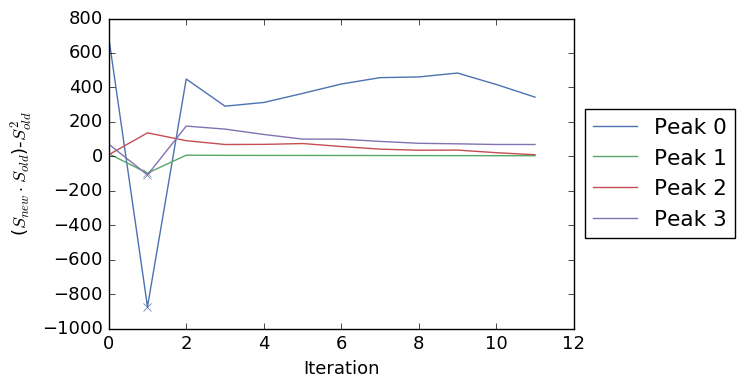

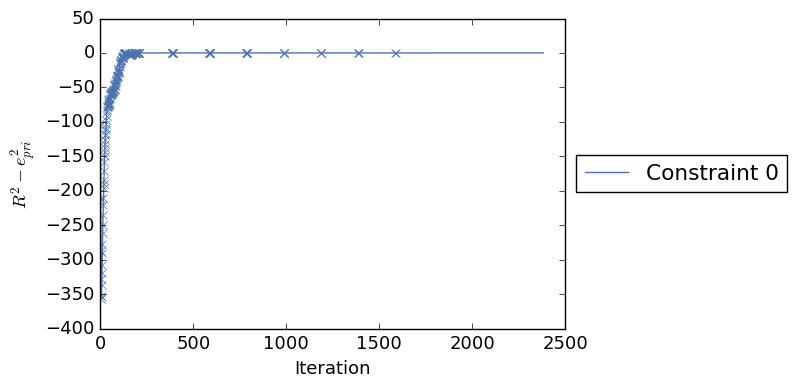

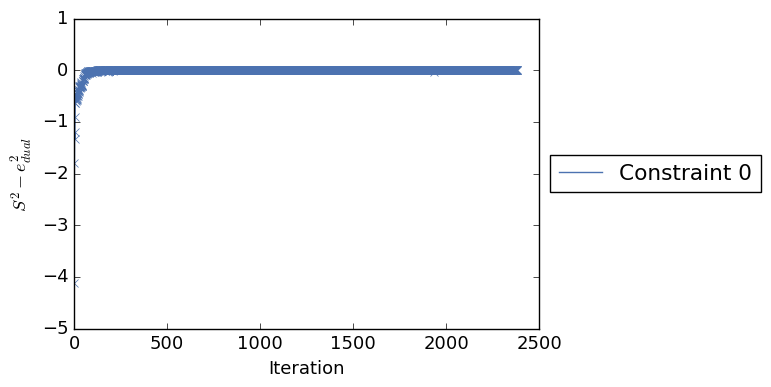

In [4]:
admm.convergencePlots()

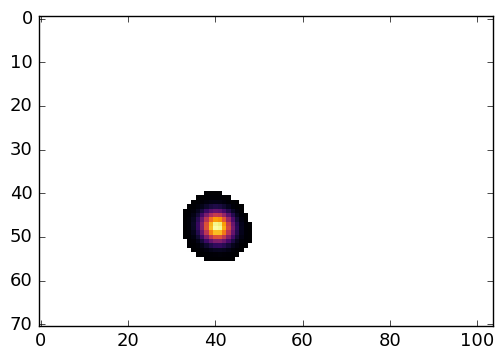

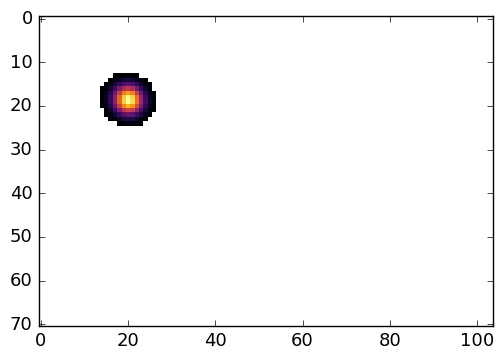

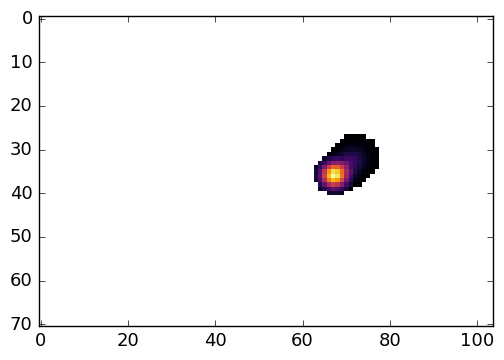

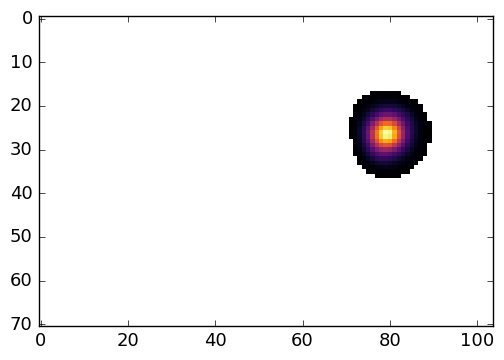

In [5]:
admm.displayAllImages(0)

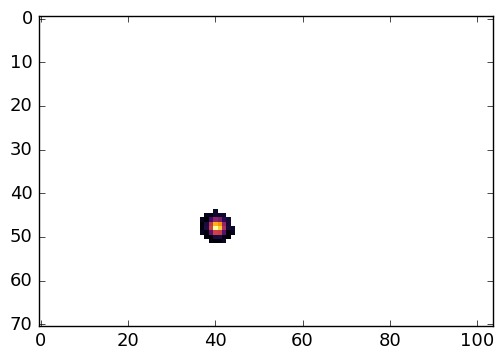

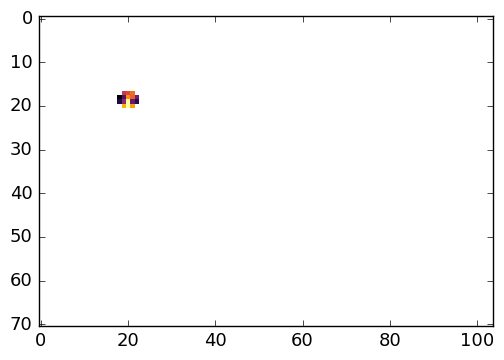

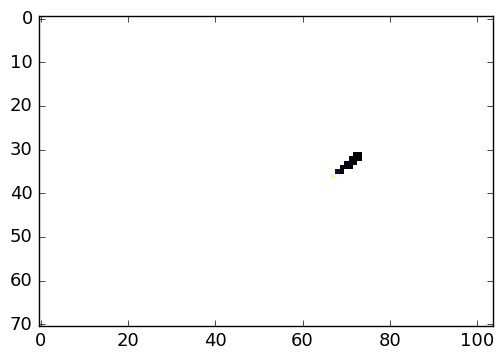

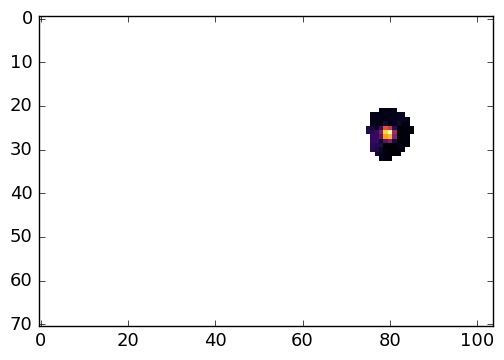

In [6]:
admm.displayAllImages(imgType='intensity')

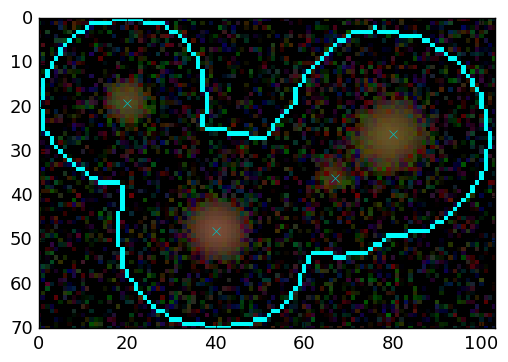

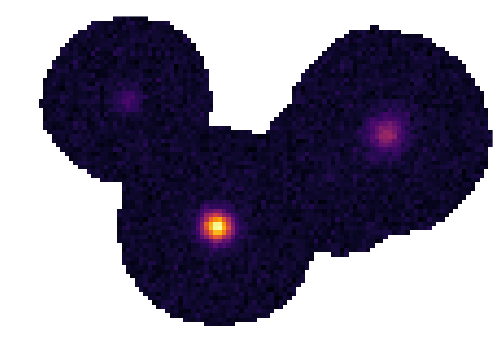

INFO:lsst.meas.deblender.proximal:constraints: MS
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:0 1.49262602623 199 113.258791041 150 [1, 1, 1, 1]
INFO:lsst.meas.deblender.proximal_nmf:1 0.00108924407523 190 113.37660533 107 [69, 21, 11, 105]
INFO:lsst.meas.deblender.proximal_nmf:2 0.00137294206844 161 113.357805896 64 [47, 21, 11, 105]
INFO:lsst.meas.deblender.proximal_nmf:3 0.00135401409236 13 113.357659153 107 [47, 21, 11, 105]
INFO:lsst.meas.deblender.proximal_nmf:4 0.00133661362016 151 113.352071476 74 [47, 21, 11, 105]
INFO:lsst.meas.deblender.proximal_nmf:5 0.00132830058799 0 113.352064929 67 [47, 21, 11, 105]
INFO:lsst.meas.deblender.proximal_nmf:6 0.00132240949501 144 113.348171047 99 [47, 21, 1

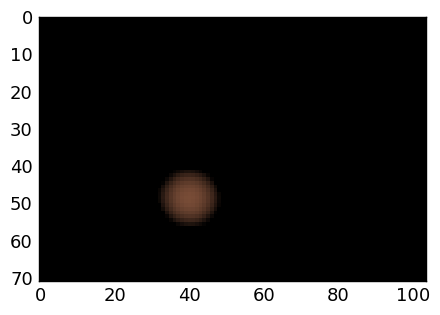

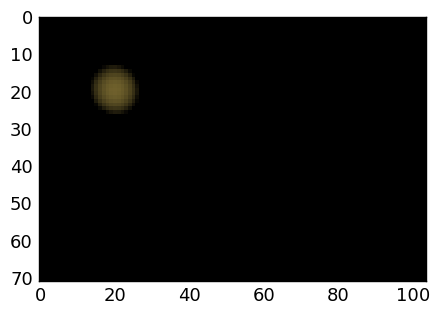

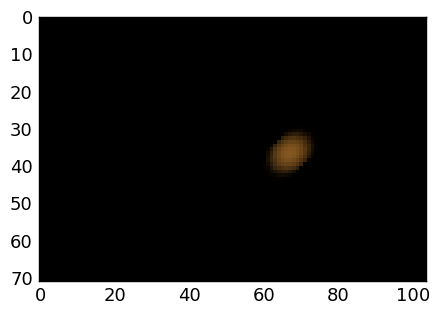

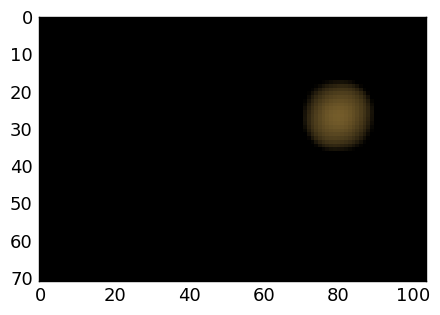

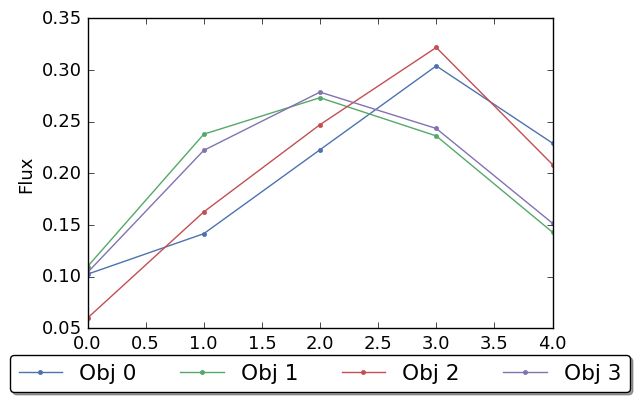

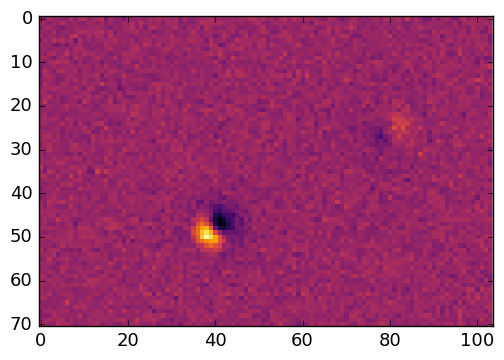

CPU times: user 58.3 s, sys: 2.45 s, total: 1min
Wall time: 1min


In [7]:
%time sdmm = expDb.deblendParent(condition=expDb.mergedTable["peaks"]==4, display=True, maxiter=200, constraints='MS', nonSymmetricFill=0, algorithm="SDMM", l0_thresh=.005, usePsf=True, psfThresh=3e-3)

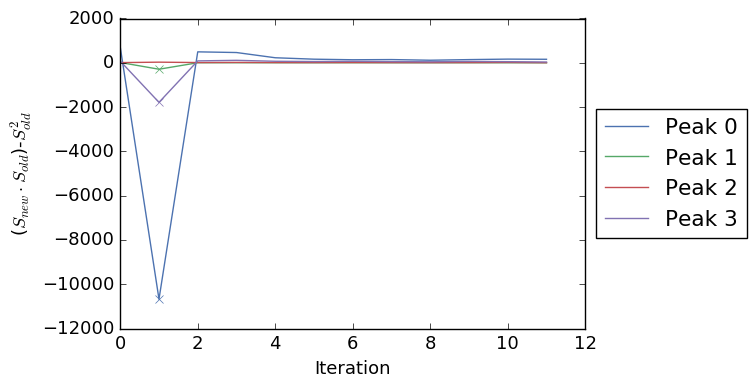

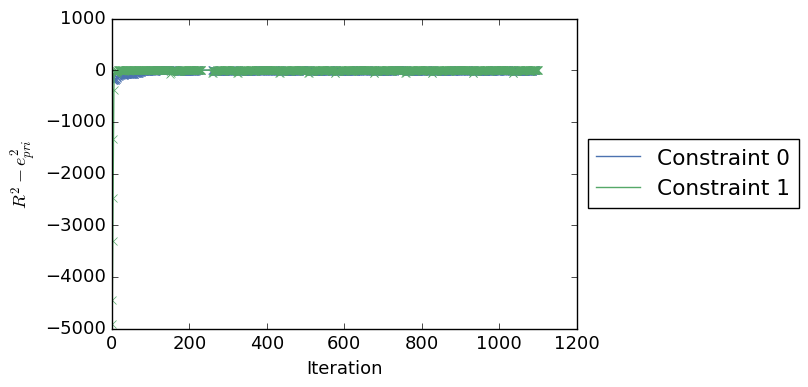

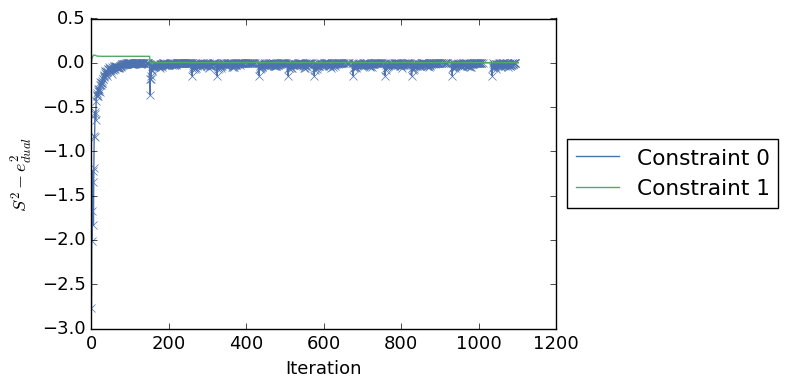

In [8]:
sdmm.convergencePlots()

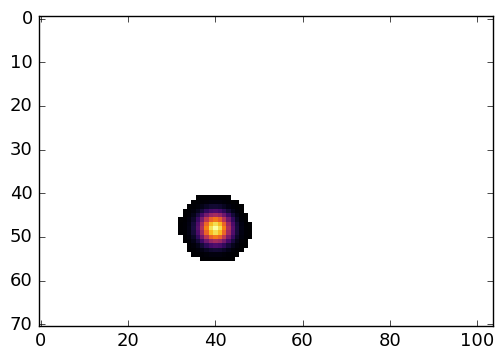

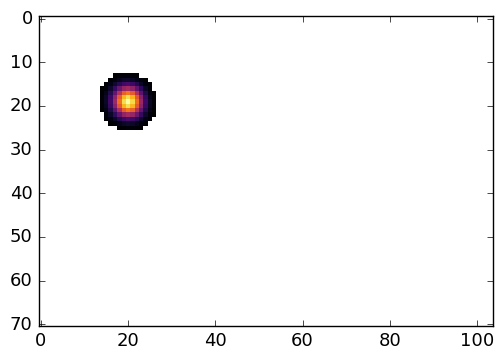

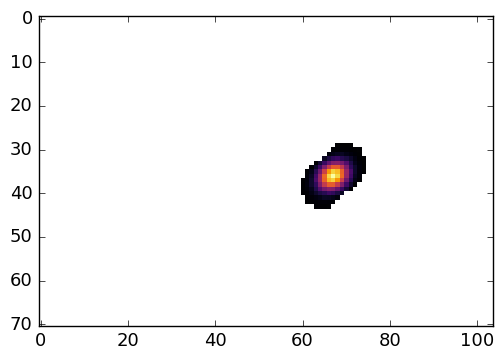

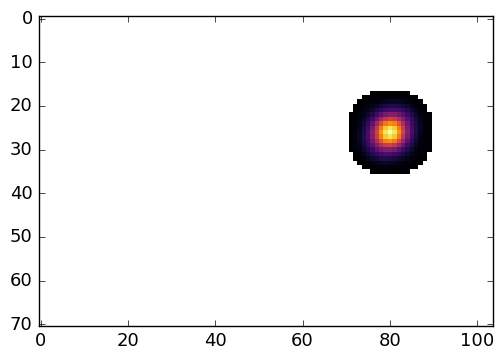

In [9]:
sdmm.displayAllImages(0)

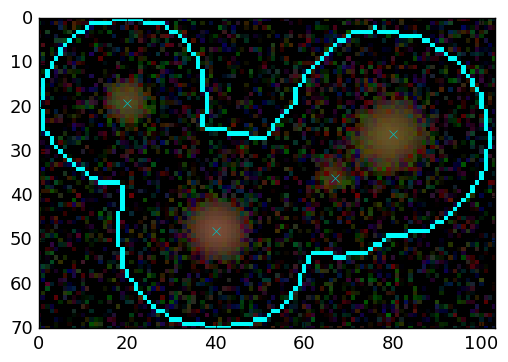

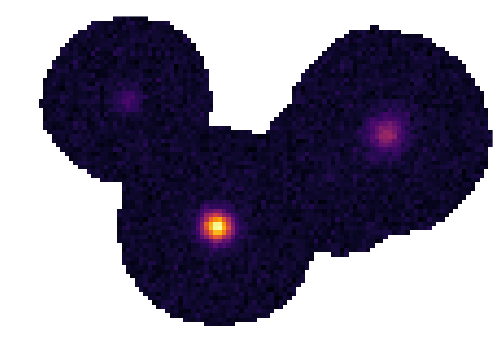

INFO:lsst.meas.deblender.proximal:constraints: MS
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Total psf pixels: 65
INFO:lsst.meas.deblender.proximal_nmf:Beginning Loop
INFO:lsst.meas.deblender.proximal_nmf:169 iterations
INFO:lsst.meas.deblender.proximal:Filter g
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 1.18759465411
INFO:lsst.meas.deblender.proximal:Residual difference 12.1%
INFO:lsst.meas.deblender.proximal:Filter r
INFO:lsst.meas.deblender.proximal:Pixel range: -0.447213292122 to 12.333483696
INFO:lsst.meas.deblender.proximal:Max difference: 1.64041586069
INFO:lsst.meas.deblender.proximal:Residual difference 13.1%
INFO:lsst.meas.deblender.proximal:Filter i
INFO:lsst.meas

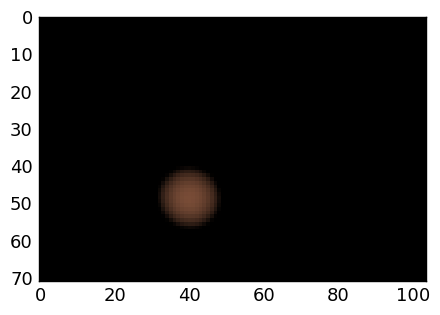

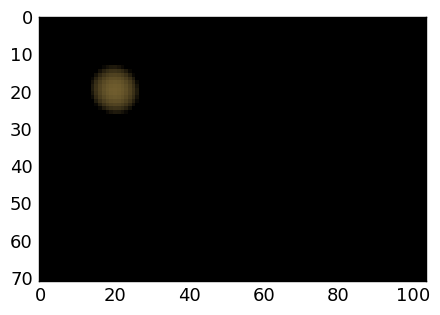

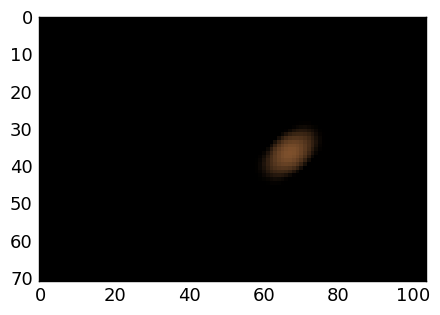

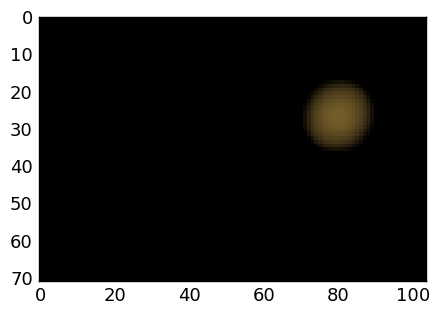

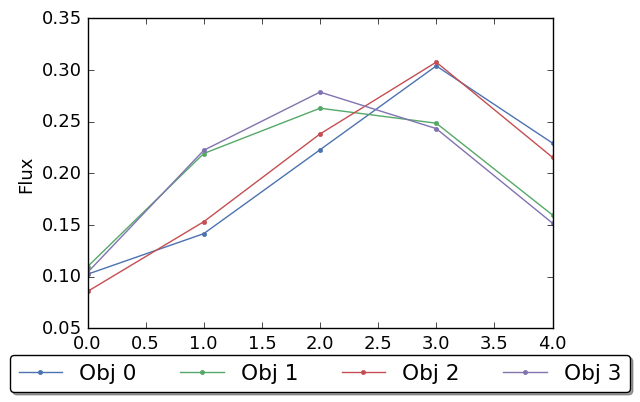

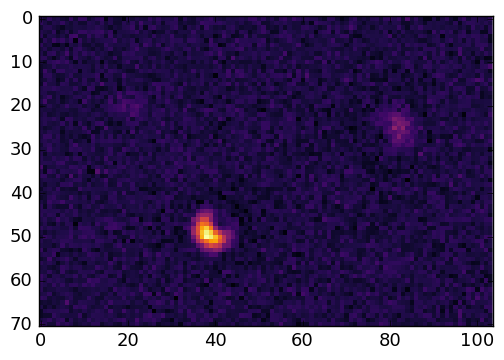

CPU times: user 20.1 s, sys: 2.2 s, total: 22.3 s
Wall time: 22 s


In [10]:
%time glmm = expDb.deblendParent(condition=expDb.mergedTable["peaks"]==4, display=True, maxiter=1000, constraints='MS', nonSymmetricFill=0, algorithm="GLM", usePsf=True, psfThresh=3e-3, l0_thresh=.005)

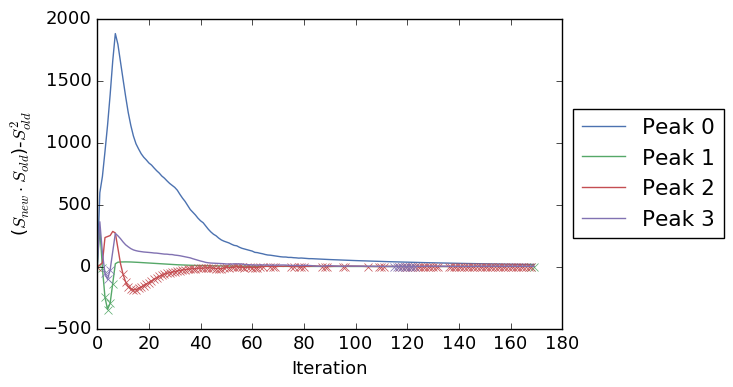

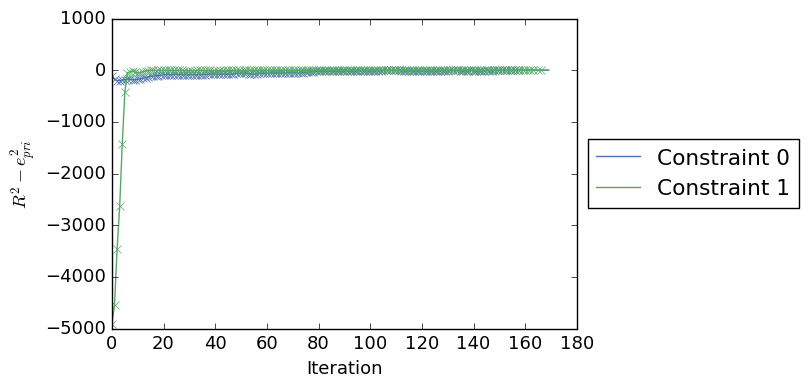

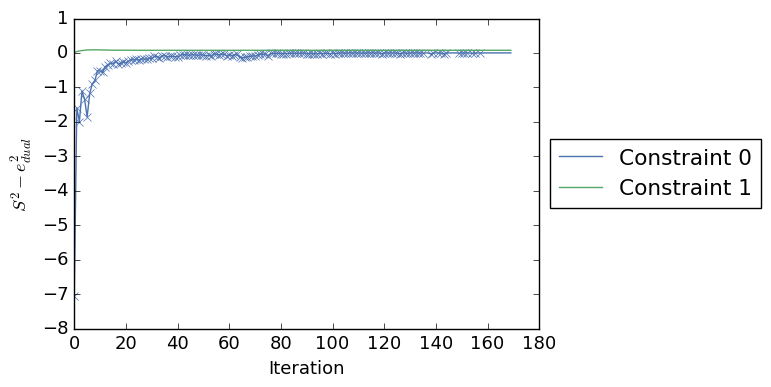

In [11]:
glmm.convergencePlots()

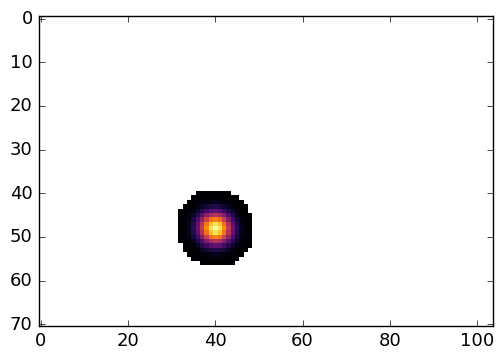

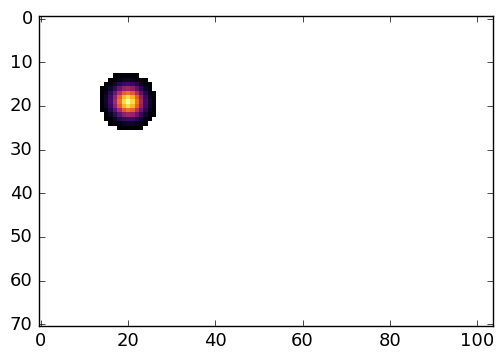

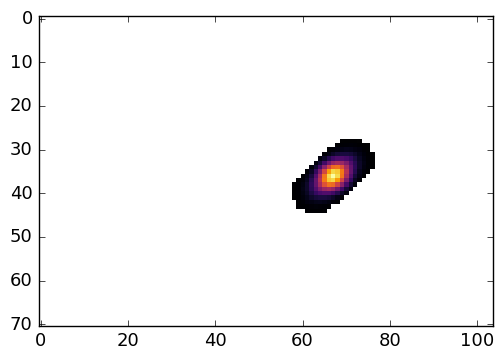

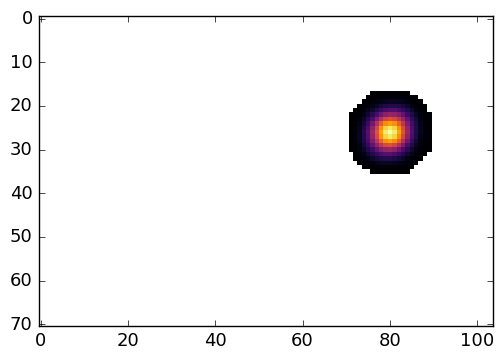

In [12]:
glmm.displayAllImages(0)

# SEDs

We also compare the SED's to make sure that they are converging properly. Below we see that the ADMM and SDMM SED's are identical (as expected, since the outer loop is the same for both of them).

The GLMM SED is slightly different for the two fainter sources but when we look at the last set of plots we see that this difference is no different than the error in the measurement of the two faint SEDs themselves, as each faint source has the same SED as one of the brighter sources.

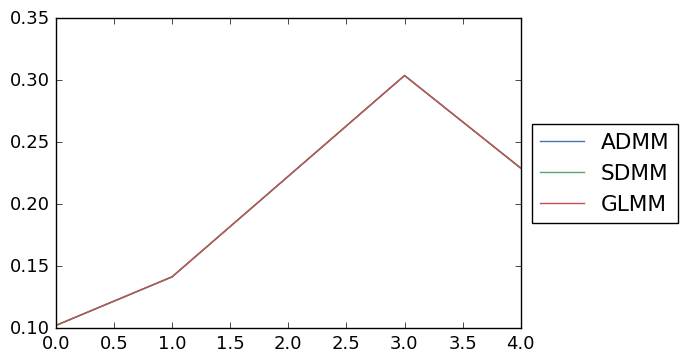

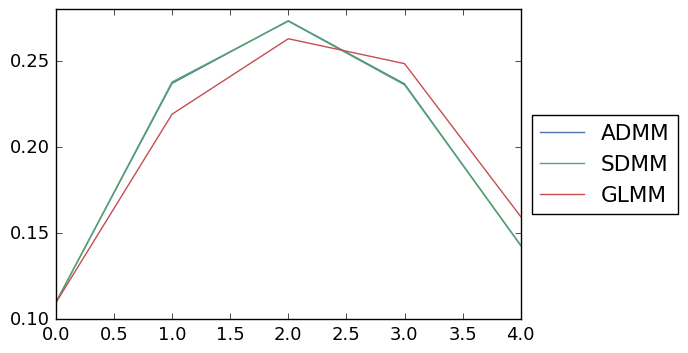

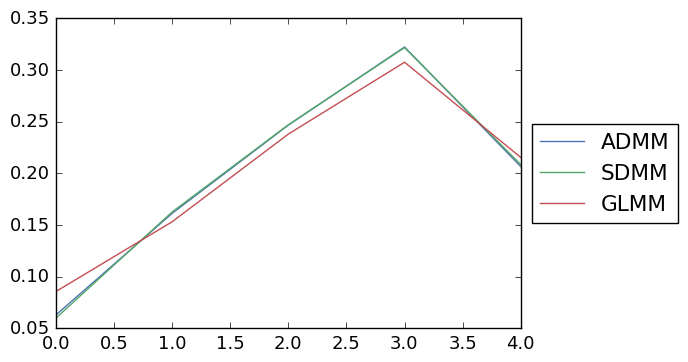

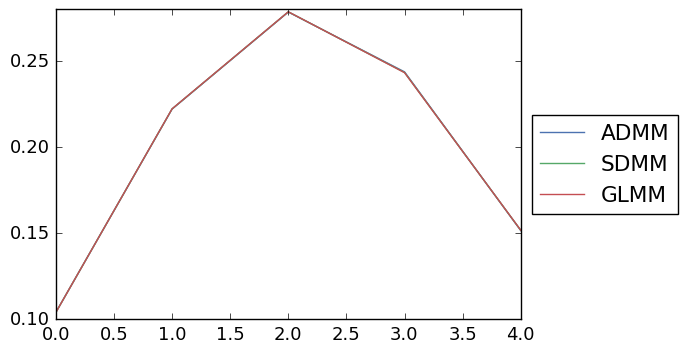

In [22]:
for k in range(len(sdmm.seds[0])):
    plt.plot(admm.seds[:, k], label="ADMM")
    plt.plot(sdmm.seds[:, k], label="SDMM")
    plt.plot(glmm.seds[:, k], label="GLMM")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

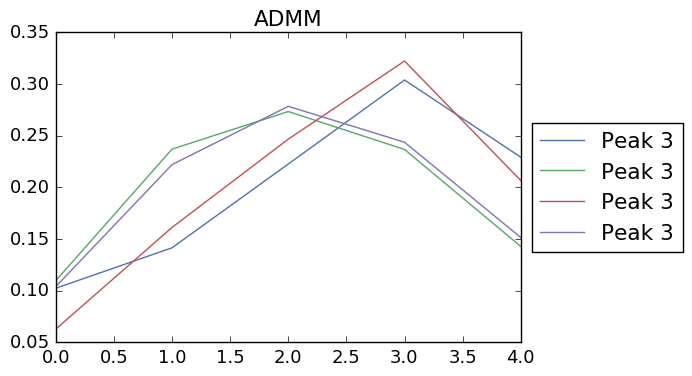

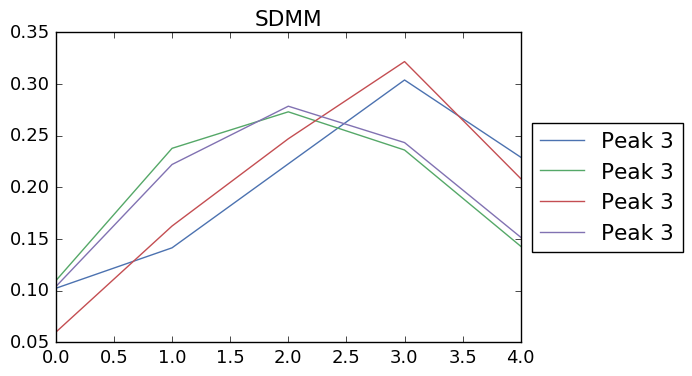

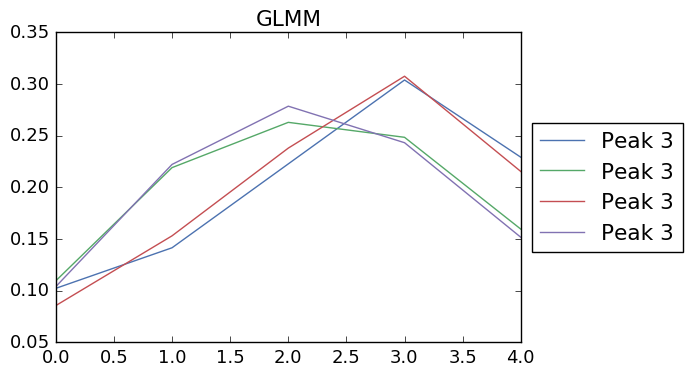

In [23]:
for sed in admm.seds.T:
    plt.plot(sed, label="Peak {0}".format(k))
plt.title("ADMM")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

for sed in sdmm.seds.T:
    plt.plot(sed, label="Peak {0}".format(k))
plt.title("SDMM")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

for sed in glmm.seds.T:
    plt.plot(sed, label="Peak {0}".format(k))
plt.title("GLMM")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()